In [1]:
cd /content/drive/My Drive/Using Keras Pre-trained Deep Learning models for your own dataset

/content/drive/My Drive/Using Keras Pre-trained Deep Learning models for your own dataset


In [0]:
# a = []
# while(1):
#     a.append(1)

In [2]:
# from keras.layers import *
from keras.preprocessing import image
import numpy as np
# from scipy.misc import imsave
import  numpy  as  np
from keras.layers import Dropout, Flatten, Dense
# from keras.applications import ResNet50
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import Model, Sequential

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(224, 224, 3), padding='VALID'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='VALID'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='VALID'))
model.add(Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu', padding='VALID'))
model.add(Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu', padding='VALID'))
model.add(AveragePooling2D(pool_size=(19, 19)))

# set of FC => RELU layers
model.add(Flatten())

#getting the summary of the model (architecture)
model.summary()



Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 128)     36992     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 256)     295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 104, 104, 256)     590080    
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 256)        

In [0]:
import os
from tqdm import tqdm
from PIL import Image
import cv2

#Binary Patches Dis

In [0]:
#Transfer 'jpg' images to an array IMG
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    # IMGB = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)
            img = cv2.resize(img, (RESIZE,RESIZE))
            # img_data = image.img_to_array(img)
            img_data = np.expand_dims(img, axis=0)
            feature = model.predict(img_data)
            feature_mean=np.mean(feature, axis =1)
            feaature_std=np.std(feature, axis = 1)
            values=(feature_mean + feaature_std)
            # print(PATH)
            # print(feaature_std)
            # IMGA.append(np.array(feature_mean))
            # IMGB.append(np.array(feaature_std))
            threshold=np.floor(values)
            if threshold > 25:       #40 27
                IMG.append(np.array(img))
            #IMG.append(np.array(img))
    return IMG
BA_train = np.array(Dataset_loader('/content/drive/My Drive/BreaKHis_v1/New_patches/8cls_patches/40/B_A',224))
BF_train = np.array(Dataset_loader('/content/drive/My Drive/BreaKHis_v1/New_patches/8cls_patches/40/B_F',224))
BPT_train = np.array(Dataset_loader('/content/drive/My Drive/BreaKHis_v1/New_patches/8cls_patches/40/B_PT',224))
BTA_train = np.array(Dataset_loader('/content/drive/My Drive/BreaKHis_v1/New_patches/8cls_patches/40/B_TA',224))
MDC_train = np.array(Dataset_loader('/content/drive/My Drive/BreaKHis_v1/New_patches/8cls_patches/40/M_DC',224))
MLC_train = np.array(Dataset_loader('/content/drive/My Drive/BreaKHis_v1/New_patches/8cls_patches/40/M_LC',224))
MMC_train = np.array(Dataset_loader('/content/drive/My Drive/BreaKHis_v1/New_patches/8cls_patches/40/M_MC',224))
MPC_train = np.array(Dataset_loader('/content/drive/My Drive/BreaKHis_v1/New_patches/8cls_patches/40/M_PC',224))

100%|██████████| 864/864 [00:32<00:00, 26.80it/s]


In [0]:
BA_train.shape

(0,)

In [0]:
BF_train.shape

(0,)

In [0]:
BTA_train.shape

(0,)

In [0]:
MPC_train.shape

(0,)

In [0]:
from keras.utils.np_utils import to_categorical
# Skin Cancer: Malignant vs. Benign
# Create labels
BA_train_label = np.zeros(len(BA_train))
BF_train_label = np.ones(len(BF_train))
BPT_train_label = np.full(len(BPT_train),2)
BTA_train_label = np.full(len(BTA_train),3)
MDC_train_label = np.full(len(MDC_train),4)
MLC_train_label = np.full(len(MLC_train),5)
MMC_train_label = np.full(len(MMC_train),6)
MPC_train_label = np.full(len(MPC_train),7)

# Merge data 
X_train = np.concatenate((BA_train, BF_train,BPT_train,BTA_train,MDC_train,MLC_train,MMC_train,MPC_train), axis = 0)
Y_train = np.concatenate((BA_train_label, BF_train_label,BPT_train_label,BTA_train_label,MDC_train_label,MLC_train_label,MMC_train_label,MPC_train_label), axis = 0)

# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

# To categorical
Y_train = to_categorical(Y_train, num_classes= 8)

In [0]:
cd /content/drive/My Drive/Mean and std

/content/drive/My Drive/Mean and std


In [0]:
X_train.shape

In [0]:
np.save('New40_8_Xtrain_dis_patch.npy',X_train)

In [0]:
np.save('New40_8_Ytrain_dis_patch.npy',Y_train)

In [0]:
import numpy as np

In [0]:
X_train=np.load('/content/drive/My Drive/Mean and std/New40_8_Xtrain_dis_patch.npy')
Y_train=np.load('/content/drive/My Drive/Mean and std/New40_8_Ytrain_dis_patch.npy')

In [0]:
X_train.shape

In [0]:
import json
import math
import os

import cv2
from PIL import Image
#import numpy as np
from keras import layers
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


%matplotlib inline

Using TensorFlow backend.


In [0]:
pip install -U efficientnet

In [0]:
x_train, x_test, y_train, y_test = train_test_split(
    X_train, Y_train, 
    test_size=0.25, 
    random_state=11
)

In [0]:
def color_preprocessing(x_train, x_test):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    mean = [125.307, 122.95, 113.865]
    std = [62.9932, 62.0887, 66.7048]
    for i in range(3):
        x_train[:, :, :, i] = (x_train[:, :, :, i] - mean[i]) / std[i]
        x_test[:, :, :, i] = (x_test[:, :, :, i] - mean[i]) / std[i]
    return x_train, x_test

In [0]:
x_train, x_test = color_preprocessing(x_train, x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

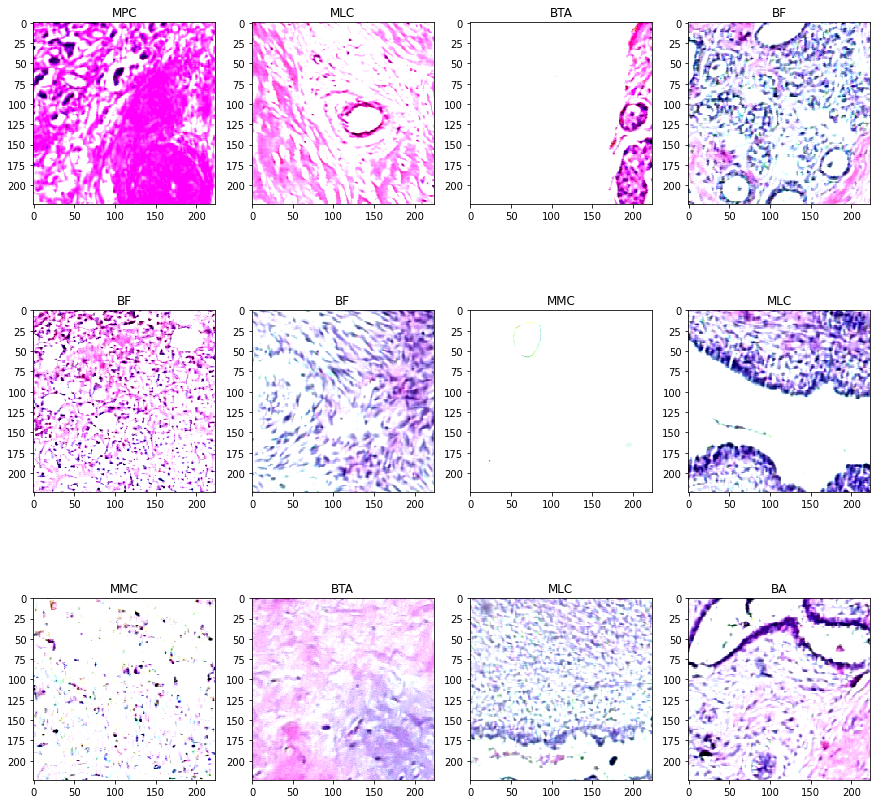

In [0]:
# # Display first 15 images of moles, and how they are classified
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(Y_train[i]) == 0:
        ax.title.set_text('BA')
    if np.argmax(Y_train[i]) == 1:
        ax.title.set_text('BF')
    if np.argmax(Y_train[i]) == 2:
        ax.title.set_text('BPT')
    if np.argmax(Y_train[i]) == 3:
        ax.title.set_text('BTA')
    if np.argmax(Y_train[i]) == 4:
        ax.title.set_text('MDC')
    if np.argmax(Y_train[i]) == 5:
      ax.title.set_text('MLC')
    if np.argmax(Y_train[i]) ==6:
        ax.title.set_text('MMC')
    if np.argmax(Y_train[i]) ==7:
        ax.title.set_text('MPC')         
  
    plt.imshow(x_train[i], interpolation='nearest')
plt.show()

In [0]:
import efficientnet.keras as efn 

In [0]:
BATCH_SIZE = 16
# Using original generator
train_generator = ImageDataGenerator(
        zoom_range=0.2,  # set range for random zoom
        rotation_range = 90,
        width_shift_range=0.1,
        height_shift_range=0.1,
         # randomly flip images
    )

In [0]:

def build_model(backbone, lr=1e-4):
    model = Sequential()
    #backbone.summary()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(8, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    return model

In [0]:

K.clear_session()
gc.collect()
efficeient =  efn.EfficientNetB5(weights='imagenet',include_top=False,input_shape=(224,224,3))
#efficeient.summary()
model = build_model(efficeient ,lr = 1e-4)
model.summary()

115515392/115515256 [==============================] - 8s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b5 (Model)      (None, 7, 7, 2048)        28513520  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16392     
Total params: 28,538,104
Trainable params: 28,361,272
Non-trainable params: 176,832
_________________________________________________________________


In [0]:
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
# Checkpoint
filepath="weights-8-40B5.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [0]:
#es = EarlyStopping(monitor='val_accuracy', mode='max', patience=12)

In [0]:
history = model.fit(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=100,
    epochs=120,
    validation_data=(x_test, y_test),
    validation_steps=50,
    callbacks=[learn_control, checkpoint]
)

Epoch 1/120
100/100 [==============================] - 128s 1s/step - loss: 2.4444 - accuracy: 0.1931 - val_loss: 2.0046 - val_accuracy: 0.2151

Epoch 00001: val_accuracy improved from -inf to 0.21513, saving model to weights-8-40B5.best.hdf5
Epoch 2/120
100/100 [==============================] - 70s 700ms/step - loss: 1.8515 - accuracy: 0.3400 - val_loss: 1.6716 - val_accuracy: 0.4084

Epoch 00002: val_accuracy improved from 0.21513 to 0.40838, saving model to weights-8-40B5.best.hdf5
Epoch 3/120
100/100 [==============================] - 71s 706ms/step - loss: 1.6338 - accuracy: 0.4440 - val_loss: 1.3057 - val_accuracy: 0.5372

Epoch 00003: val_accuracy improved from 0.40838 to 0.53721, saving model to weights-8-40B5.best.hdf5
Epoch 4/120
100/100 [==============================] - 70s 698ms/step - loss: 1.3773 - accuracy: 0.5300 - val_loss: 1.0524 - val_accuracy: 0.6485

Epoch 00004: val_accuracy improved from 0.53721 to 0.64853, saving model to weights-8-40B5.best.hdf5
Epoch 5/120
1

In [0]:
with open('history.json', 'w') as f:
    json.dump(str(history.history), f)

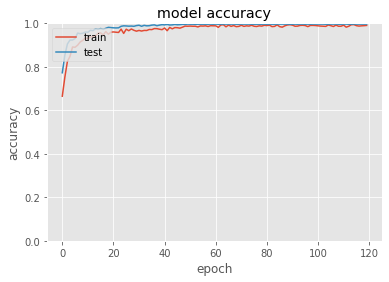

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

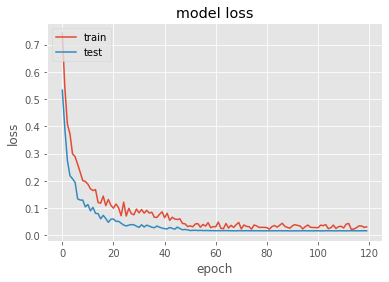

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

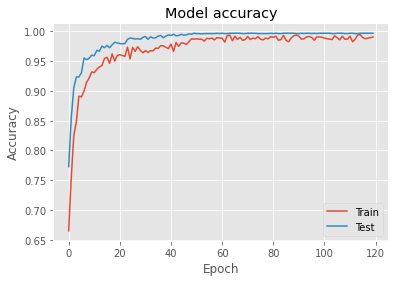

In [0]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

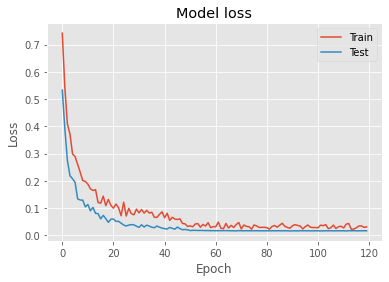

In [0]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

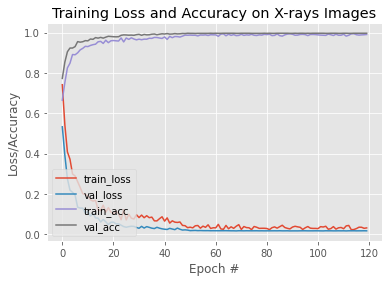

In [0]:
# plot the training loss and accuracy
N = 120
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on X-rays Images")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot")

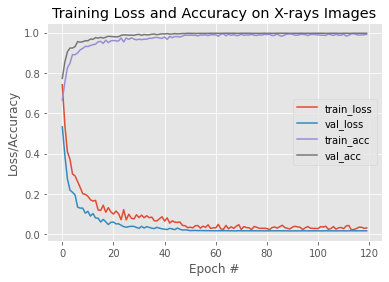

In [0]:
# plot the training loss and accuracy
N = 120
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on X-rays Images")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("plot")

In [0]:
y_pred = model.predict(x_test)

In [0]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

0.9967620075553157

In [0]:
from sklearn.metrics import matthews_corrcoef

In [0]:
matthews_corrcoef(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

0.9906880734952433

In [0]:
cohen_kappa_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

0.9906689047419219

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
roc_auc_score(y_test,y_pred)

0.9983673250896632

In [0]:
from sklearn.metrics import f1_score

In [0]:
f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')

0.9953344210452105

In [0]:
f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='micro')

0.9967620075553157

In [0]:
 f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

0.996756436486008

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [0]:
precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')

0.9970515014519313

In [0]:
precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='micro') 

0.9967620075553157

In [0]:
precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

0.9967642582367278

In [0]:
recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')

0.9936424375033457

In [0]:
recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='micro') 

0.9967620075553157

In [0]:
recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

0.9967620075553157

In [0]:
model.evaluate(x_test,y_test)

1853/1853 [==============================] - 19s 10ms/step


[0.017030387852718893, 0.9967620372772217]

In [0]:
Y_pred = model.predict(x_test)

#Confusion Matrix

Confusion matrix, without normalization
[[ 411    5]
 [   1 1436]]


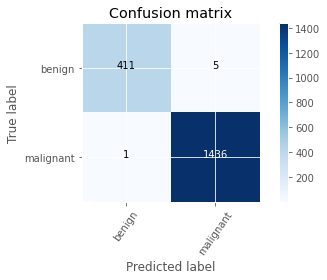

In [0]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label)

Confusion matrix, without normalization
[[ 411    5]
 [   1 1436]]


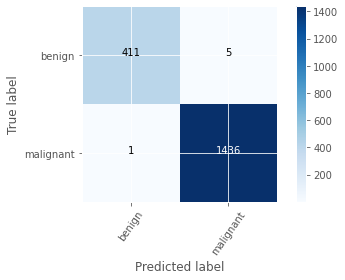

In [0]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='')

In [0]:
from sklearn.metrics import classification_report
classification_report( np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       416\n           1       1.00      1.00      1.00      1437\n\n    accuracy                           1.00      1853\n   macro avg       1.00      0.99      1.00      1853\nweighted avg       1.00      1.00      1.00      1853\n'

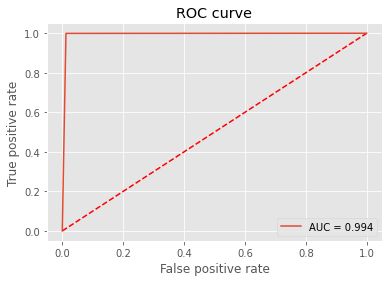

In [0]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


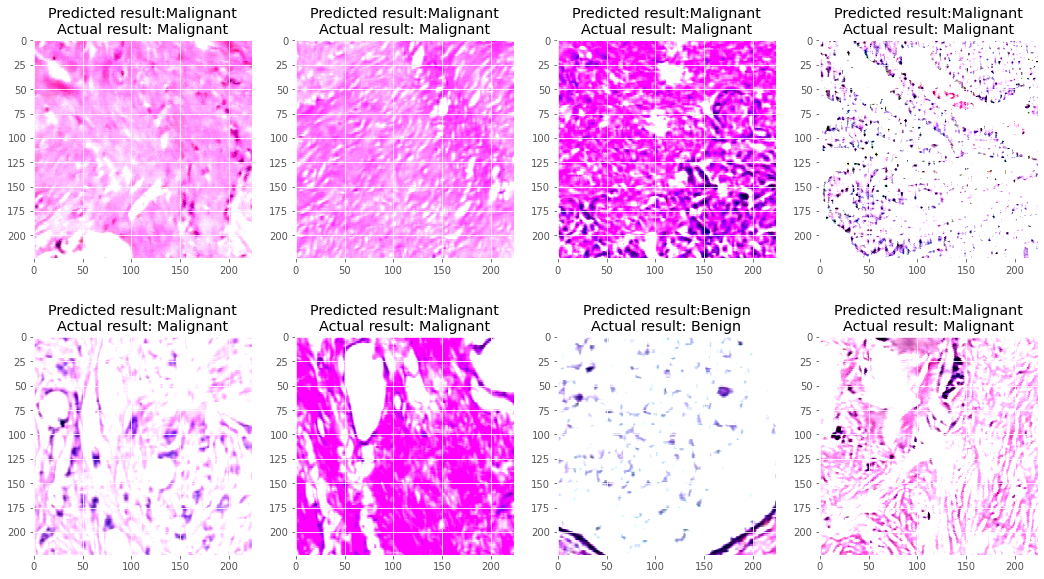

In [0]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==np.argmax(Y_test_pred[i])):
        prop_class.append(i)
    if(len(prop_class)==8):
        break
i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==np.argmax(Y_test_pred[i])):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

# # Display first 8 images of benign
w=60
h=40
fig=plt.figure(figsize=(18, 10))
columns = 4
rows = 2

def Transfername(namecode):
    if namecode==0:
        return "BA"
    if namecode==1:
        return "BF"
    if namecode==2:
        return "BPT"
    if namecode==3:
        return "BTA"
    if namecode==4:
        return "MDC"
    if namecode==5:
        return "MLC"
    if namecode==6:
        return "MMC"
    if namecode==7:
        return "MPC"                           
    
for i in range(len(prop_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ Transfername(np.argmax(Y_test_pred[prop_class[i]]))
                       +"\n"+"Actual result: "+ Transfername(np.argmax(y_test[prop_class[i]])))
    plt.imshow(x_test[prop_class[i]], interpolation='nearest')
plt.show()

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

In [0]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)